In [1]:
import pandas as pd 
import numpy as np 
import pylab
import matplotlib.pyplot as plt
fs="\t"

path="/Users/Hp/Desktop/2000_cohort_analysis/"
 # import feature count matrix whole set
import seaborn as sns


# wholeset 2000 cohort 
df=pd.read_csv(path + "data_Figure_S4D.csv")
df.head()

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


,Cluster,asymptomatic,severe
0,Cluster 1,773,778
1,Cluster 2,772,778
2,Cluster 3,265,502


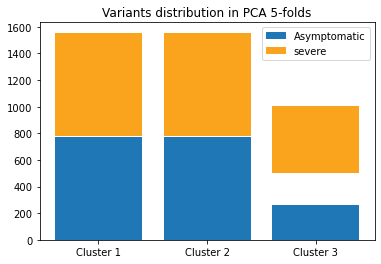

In [2]:
df.set_index(['Cluster'], inplace=True)
fig, ax = plt.subplots()
ax.bar(df.index, df['asymptomatic'], label='Asymptomatic', color = '#1F78B5')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(df.index, df['severe'], bottom=df['severe'],
       label='severe', color = '#FAA41D')
ax.set_title('Variants distribution in PCA 5-folds')
ax.legend()

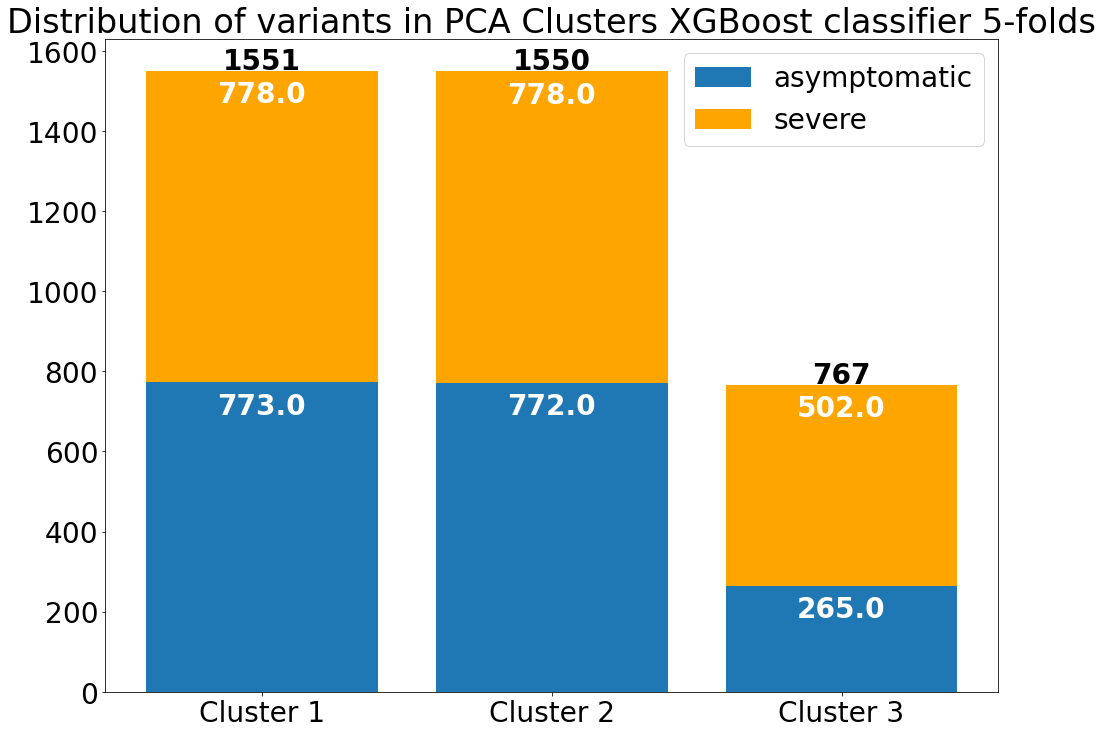

In [3]:
### Plot stacked bar-chart showing variant distributions in each PCA cluster 
plt.rc('font', size=28) 
fig, ax = plt.subplots()
colors = ['#1f77b4', '#ffa500']
bottom = np.zeros(len(df))

for i, col in enumerate(df.columns):
  ax.bar(
      df.index, df[col], bottom=bottom, label=col, color=colors[i])
  bottom += np.array(df[col])

totals = df.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -80
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=28
  )
fig.set_size_inches(16, 12, forward=True)
ax.set_title('Distribution of variants in PCA Clusters XGBoost classifier 5-folds')
ax.legend()
plt.savefig(path+'stacked_bar_variants_chart_PCA_clusters_1_3_corrected.pdf', format="pdf", bbox_inches="tight")

In [4]:
# Boxplot distributions for 2000 cohort 
df=pd.read_csv(path + "PCA_cluster_all_folds.csv")
df.head()

,sample_ID,age,Cluster Grouping,Cluster
0,AR-COV-4_hg38,62,1,cluster 1
1,AR-COVID1-USC-AREZZO_hg38,46,1,cluster 1
2,AR-COVID2-USC-AREZZO_hg38,46,1,cluster 1
3,BS-COV-21_hg38,33,1,cluster 1
4,BS-COV-6_hg38,55,1,cluster 1


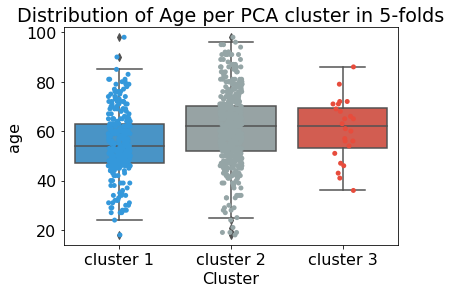

In [5]:
plt.rc('font', size=16) 
fig.set_size_inches(16, 20, forward=True)
flatui = ["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))
ax= sns.boxplot(x='Cluster',y='age',data=df)
ax = sns.stripplot(x="Cluster", y="age",data=df)
ax.set_title('Distribution of Age per PCA cluster in 5-folds')
plt.savefig(path+'Distribution of Age per PCA cluster.pdf', format="pdf", bbox_inches="tight")